In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv(r'C:\Users\sam\Desktop\ab\data\AdSmartABdata.csv', engine = 'python')

In [3]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [5]:
df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [6]:
df.describe(include=[np.object])

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,270,15
top,b0905ee9-cc4c-4f05-b7c6-4844377d3109,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [8]:
df.isna().sum()
# no missing values

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
auction_id     8077 non-null object
experiment     8077 non-null object
date           8077 non-null object
hour           8077 non-null int64
device_make    8077 non-null object
platform_os    8077 non-null int64
browser        8077 non-null object
yes            8077 non-null int64
no             8077 non-null int64
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [11]:
#seeing the numerical and categorical data
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


In [20]:
pd.Series(df['browser'].value_counts())

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Pinterest                        3
Opera Mobile                     3
Chrome                           3
Firefox Mobile                   1
Opera Mini                       1
Edge Mobile                      1
Android                          1
Puffin                           1
Name: browser, dtype: int64

In [4]:
def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

In [19]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=10, fontweight='bold')
    plt.show()
    
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

    

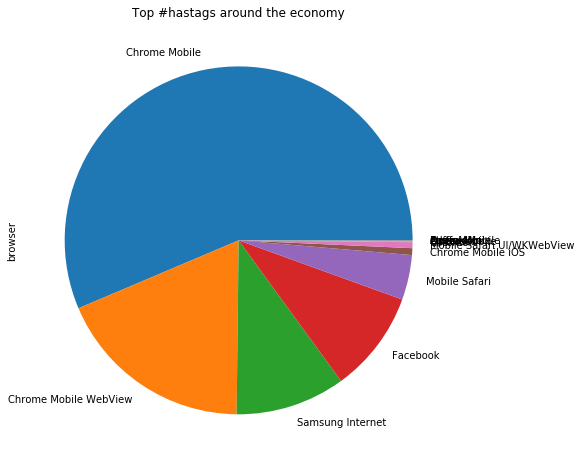

In [15]:
browser_dis = pd.Series(df['browser'].value_counts())
browser_dis.plot(kind="pie", title="browsers used by the customers", figsize=[8, 8])

## the most used browsers used by our customers is Chrome_mobile followed by chrome mobile webview and samsung internet

In [18]:
pd.Series(df['device_make'].value_counts()).head(10)

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Samsung SM-G930F       100
Samsung SM-G975F        97
Samsung SM-A202F        88
Samsung SM-A405FN       87
Samsung SM-J330FN       69
Name: device_make, dtype: int64

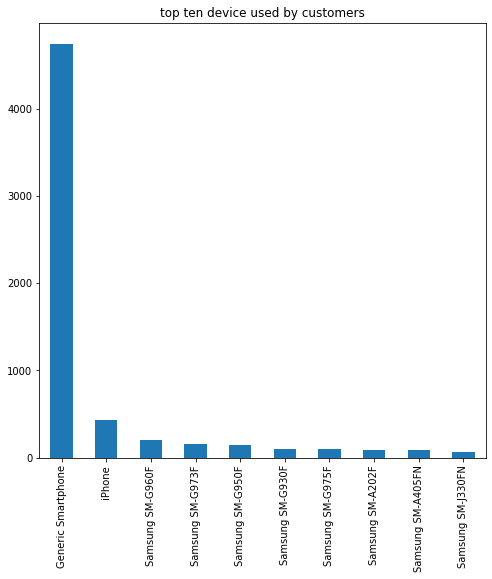

In [21]:
device_make = pd.Series(df['device_make'].value_counts()).head(10)
device_make.plot(kind="bar", title="top ten device used by customers", figsize=[8, 8])

### the top device make were generic smartphones but next to that iphone and samsung hold most of the share

In [22]:
pd.Series(df['date'].value_counts())

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

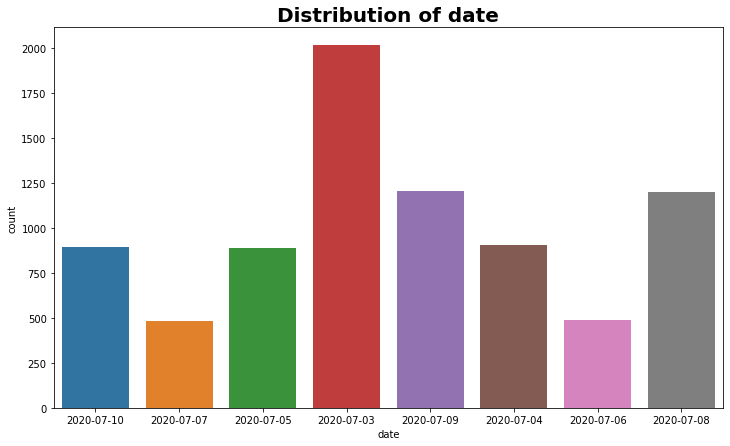

In [23]:
plot_count(df, 'date')

### the most engaged day from the testing was on 03-07-2020. 2015 people engaged on that day

In [24]:
pd.Series(df['experiment'].value_counts())

control    4071
exposed    4006
Name: experiment, dtype: int64

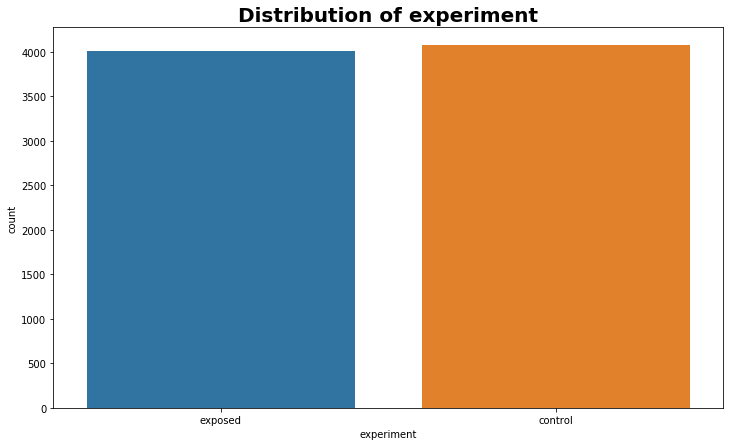

In [25]:
plot_count(df, 'experiment')

### the number of users is fairly distributed which is necessary so there is no bias

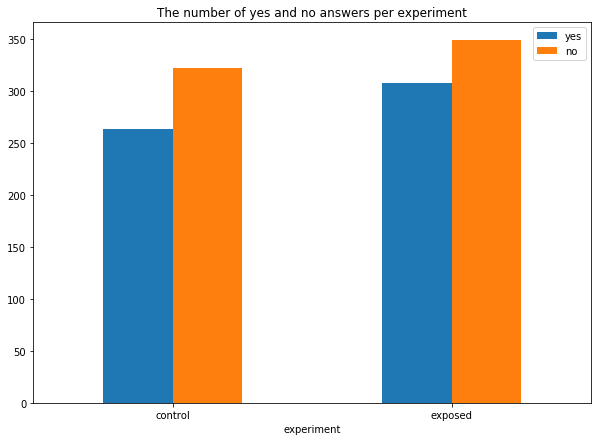

In [29]:
yes_no_agg = df.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'})
ax = yes_no_agg.plot.bar( y=['yes', 'no'],  title="The number of yes and no answers per experiment",
                          rot=0, figsize=(10,7))

In [28]:
pd.Series(df['auction_id'].unique())

0       0008ef63-77a7-448b-bd1e-075f42c55e39
1       000eabc5-17ce-4137-8efe-44734d914446
2       0016d14a-ae18-4a02-a204-6ba53b52f2ed
3       00187412-2932-4542-a8ef-3633901c98d9
4       001a7785-d3fe-4e11-a344-c8735acacc2c
                        ...                 
8072    ffea24ec-cec1-43fb-b1d1-8f93828c2be2
8073    ffea3210-2c3e-426f-a77d-0aa72e73b20f
8074    ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7
8075    ffeeed62-3f7c-4a6e-8ba7-95d303d40969
8076    fffbb9ff-568a-41a5-a0c3-6866592f80d8
Length: 8077, dtype: object

### from our two groups we have a total of 8076 users